In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nqDataLoader as nq #data loading library
from keras.preprocessing import sequence
np.random.seed(0)

In [86]:
## importing the early stage dataset 
early_stage = pd.read_csv('GT_DataPD_MIT-CS2PD.csv')
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values
early_stage["gt"] = early_stage["gt"].astype(int)
early_stage.head()

,pID,gt,updrs108,afTap,sTap,nqScore,typingSpeed,file_1
0,1000,1,27,79.0,184.5,0.107179,56.866667,1424946827.1000_001_014.csv
1,1001,1,16,96.5,189.0,0.056286,118.000000,1427279751.1001_001_014.csv
2,1002,0,5,140.0,158.0,0.039519,119.037037,1426676689.1002_001_014.csv
3,1004,1,22,83.5,191.5,0.034853,74.266667,1429866367.1004_001_014.csv
4,1005,1,17,68.0,150.0,0.048307,74.969697,1430134526.1005_001_014.csv


In [87]:
hit_time_series = []
for index, row in early_stage.iterrows():
    fileloc = row.file_1
    keyPressed, htArr, pressArr, releaseArr =  nq.getDataFiltHelper( "data_MIT-CS2PD/" + early_stage.loc[index]['file_1'])
    htArr =np.array(htArr)
    hit_time_series.append(htArr)

X1 = hit_time_series 

In [88]:
## importing the de-novo dataset 
de_novo = pd.read_csv('GT_DataPD_MIT-CS1PD.csv')
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values
print(len(de_novo))
de_novo["gt"] = de_novo["gt"].astype(int)
de_novo.head()

31


,pID,gt,updrs108,afTap,sTap,nqScore,typingSpeed,file_1,file_2
0,11,1,14.25,NaN,162.25,0.117543,189.372549,1402930351.011_001_014.csv,1403706430.011_003_014.csv
1,60,0,2.00,NaN,162.25,0.070350,60.533333,1402932300.060_001_014.csv,1403708258.060_003_014.csv
2,67,1,25.25,NaN,133.75,0.223411,54.333333,1401117235.067_001_014.csv,1401978395.067_003_014.csv
3,68,0,6.00,NaN,159.00,0.074973,71.800000,1401114972.068_001_014.csv,1401980765.068_003_014.csv
4,70,1,26.25,NaN,113.50,0.175751,39.614035,1404311419.070_001_014.csv,1404743687.070_003_014.csv


In [89]:
##using both files 
hit_time_series = []
for index, row in de_novo.iterrows():
    fileloc1 = row.file_1
    keyPressed, htArr1, pressArr, releaseArr =  nq.getDataFiltHelper( 'data_MIT-CS1PD/' + de_novo.loc[index]['file_1'])
    htArr1 = np.array(htArr1)
    keyPressed, htArr2, pressArr, releaseArr =  nq.getDataFiltHelper( 'data_MIT-CS1PD/' + de_novo.loc[index]['file_2'])
    htArr2 = np.array(htArr2)
    htArr =np.concatenate((htArr1,htArr2),axis =0)
    htArr=np.array(htArr)
    hit_time_series.append(htArr)
X2 = hit_time_series 

In [90]:
X = np.concatenate((X1,X2),axis=0)
y=  np.concatenate((early_stage['gt'],de_novo["gt"]),axis=0)
X_filtered =[]
y_filtered =[]


for i,e in enumerate(X):
    if len(e)>1:
        X_filtered.append(e)
        y_filtered.append(y[i])
min = len(X_filtered[0])
for i,e in enumerate(X_filtered):
    if len(e)<min:
        min = len(e)
        print(i)
X_filtered = np.array(X_filtered)
y_filtered = np.array(y_filtered)
X_lens = [len(e) for e in X_filtered]
avg_len = np.mean(X_lens)
print(avg_len)
print(min)
print(len(X_filtered),len(y_filtered))
print(X_filtered)
print(y_filtered)

15
40
43
1975.5882352941176
299
85 85
[array([0.3179, 0.1892, 0.1641, 0.2597, 0.1994, 0.1016, 0.122 , 0.139 ,
        0.147 , 0.2011, 0.0758, 0.1902, 0.1341, 0.1766, 0.0912, 0.2218,
        0.1295, 0.1171, 0.1057, 0.077 , 0.0969, 0.2141, 0.1101, 0.1355,
        0.1697, 0.1038, 0.1234, 0.1405, 0.1393, 0.1209, 0.1359, 0.1342,
        0.1935, 0.0775, 0.1834, 0.178 , 0.2392, 0.1381, 0.1584, 0.1741,
        0.1349, 0.2007, 0.1402, 0.1964, 0.2102, 0.1575, 0.1527, 0.0831,
        0.1709, 0.1588, 0.1162, 0.1702, 0.1259, 0.1004, 0.1751, 0.1479,
        0.1835, 0.1342, 0.1687, 0.1576, 0.1129, 0.2006, 0.1176, 0.1315,
        0.2539, 0.1244, 0.1316, 0.1911, 0.1904, 0.1438, 0.1757, 0.1734,
        0.1517, 0.18  , 0.1208, 0.1003, 0.1092, 0.1556, 0.1204, 0.2012,
        0.1609, 0.214 , 0.1929, 0.3871, 0.1575, 0.118 , 0.1306, 0.2313,
        0.1446, 0.1225, 0.1309, 0.1261, 0.1912, 0.1307, 0.1356, 0.0955,
        0.1739, 0.1349, 0.1399, 0.1971, 0.1133, 0.1099, 0.1257, 0.1404,
        0.153 , 0.1179, 0.

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\micoa\AppData\Local\Temp\ipykernel_4760\4195563876.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_filtered = np.array(X_filtered)


In [91]:
import itertools
flat_list = list(itertools.chain(*X_filtered))
value = sum(flat_list) / len(flat_list)
print(value)
X_filtered =sequence.pad_sequences(X_filtered,dtype='float32',padding='post',maxlen=6000,value =0)



0.11633377817478088


In [92]:
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_filtered,y_filtered,test_size=0.17,random_state=0)

In [94]:
X_train.shape


(70, 6000)

In [95]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X_train = sc.fit_transform(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], int(X_train.shape[1]/100),100))
print(X_train)
X_test = sc.transform(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], int(X_test.shape[1]/100),100))

[[[0.46910757 0.12045828 0.21827409 ... 0.29545456 0.08817939 0.31483424]
  [0.13366339 0.4864865  0.5429096  ... 0.33734483 0.07084893 0.41397855]
  [0.7502198  0.3023858  0.39190257 ... 0.4828869  0.64954126 0.3463395 ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.06598015 0.04680851 0.03299493 ... 0.24943884 0.33675408 0.38708556]
  [0.20579916 0.21126124 0.44745302 ... 0.99999994 1.         0.13196483]
  [0.37642917 1.         0.403695   ... 0.2466518  0.511315   0.3173773 ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.44088477 0.2752864  0.05301748 ... 0.2659933  0.05967315 0.23839441]
  [0.12623763 0.097747

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 60, 30)            15720     
                                                                 
 dropout_28 (Dropout)        (None, 60, 30)            0         
                                                                 
 lstm_29 (LSTM)              (None, 60, 30)            7320      
                                                                 
 dropout_29 (Dropout)        (None, 60, 30)            0         
                                                                 
 lstm_30 (LSTM)              (None, 60, 30)            7320      
                                                                 
 dropout_30 (Dropout)        (None, 60, 30)            0         
                                                                 
 lstm_31 (LSTM)              (None, 30)               

2/2 [==============================] - 0s 41ms/step - loss: 0.6842 - accuracy: 0.5571
Epoch 68/200
2/2 [==============================] - 0s 39ms/step - loss: 0.6838 - accuracy: 0.5286
Epoch 69/200
2/2 [==============================] - 0s 39ms/step - loss: 0.6801 - accuracy: 0.5714
Epoch 70/200
2/2 [==============================] - 0s 40ms/step - loss: 0.6800 - accuracy: 0.5429
Epoch 71/200
2/2 [==============================] - 0s 39ms/step - loss: 0.6801 - accuracy: 0.5286
Epoch 72/200
2/2 [==============================] - 0s 38ms/step - loss: 0.6796 - accuracy: 0.5286
Epoch 73/200
2/2 [==============================] - 0s 40ms/step - loss: 0.6778 - accuracy: 0.5571
Epoch 74/200
2/2 [==============================] - 0s 40ms/step - loss: 0.6761 - accuracy: 0.5571
Epoch 75/200
2/2 [==============================] - 0s 38ms/step - loss: 0.6750 - accuracy: 0.5714
Epoch 76/200
2/2 [==============================] - 0s 38ms/step - loss: 0.6734 - accuracy: 0.5857
Epoch 77/200
2/2 [=====

2/2 [==============================] - 0s 41ms/step - loss: 0.5279 - accuracy: 0.7286
Epoch 150/200
2/2 [==============================] - 0s 42ms/step - loss: 0.5333 - accuracy: 0.7286
Epoch 151/200
2/2 [==============================] - 0s 39ms/step - loss: 0.5516 - accuracy: 0.7286
Epoch 152/200
2/2 [==============================] - 0s 40ms/step - loss: 0.5254 - accuracy: 0.7714
Epoch 153/200
2/2 [==============================] - 0s 41ms/step - loss: 0.5460 - accuracy: 0.7143
Epoch 154/200
2/2 [==============================] - 0s 45ms/step - loss: 0.5424 - accuracy: 0.7143
Epoch 155/200
2/2 [==============================] - 0s 46ms/step - loss: 0.5521 - accuracy: 0.7286
Epoch 156/200
2/2 [==============================] - 0s 41ms/step - loss: 0.5424 - accuracy: 0.7286
Epoch 157/200
2/2 [==============================] - 0s 40ms/step - loss: 0.5081 - accuracy: 0.7429
Epoch 158/200
2/2 [==============================] - 0s 42ms/step - loss: 0.5359 - accuracy: 0.7429
Epoch 159/200


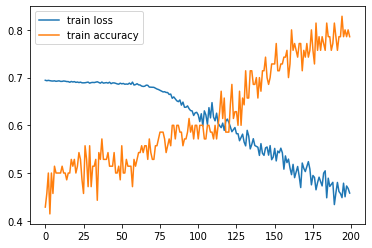

In [96]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
from keras import optimizers
import tensorflow as tf
clf = Sequential()
clf.add(LSTM(units = 30,return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
clf.add(Dropout(0.2))
clf.add(LSTM(units = 30,return_sequences = True))
clf.add(Dropout(0.2))
clf.add(LSTM(units = 30,return_sequences = True))
clf.add(Dropout(0.2))
clf.add(LSTM(units =30 ))
clf.add(Dropout(0.2))
clf.add(Dense(units = 1,activation='sigmoid'))
es = EarlyStopping(monitor='loss', mode='auto', patience =50 ,verbose=1,restore_best_weights=True)
adm = tf.keras.optimizers.Adam(learning_rate=0.0001)
clf.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
print(clf.summary())
history=clf.fit(X_train, y_train, epochs=200, batch_size=35)
scores = clf.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
train_acc = clf.evaluate(X_train, y_train, verbose=0)
test_acc = clf.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc[1], test_acc[1]))
# plot training history
pyplot.plot(history.history['loss'], label='train loss')
pyplot.plot(history.history['accuracy'], label='train accuracy')
# pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()